# Demo regularization

In this notebook, the Tikhonov regularization technique will be displayed like predicting the following function
\begin{align}
    y = \cos\Big( \frac{3}{2}\pi x\Big)
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def true_fun(X):
    y =  np.cos(1.5 * np.pi * X)
    return y

Assume there are 30 noisy samples of this function.

In [2]:
np.random.seed(0)

n_samples = 30
X = np.sort(np.random.rand(n_samples,1))
y = true_fun(X)
y += 0.1*np.random.rand(*y.shape)

First plot the data

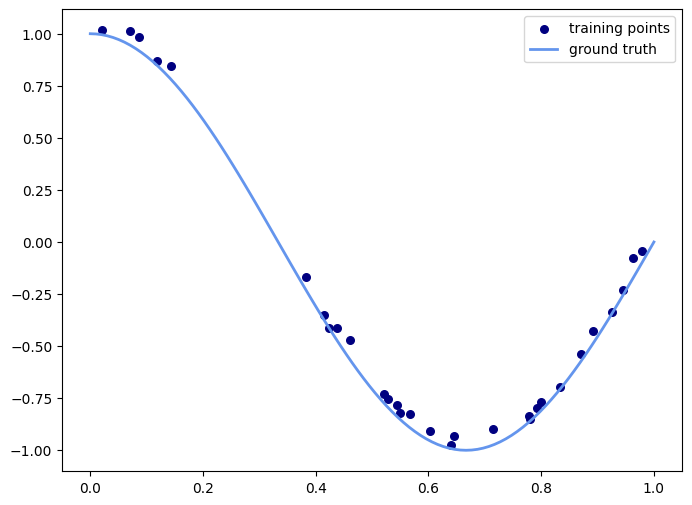

In [3]:
x_plot = np.linspace(0,1, num=100).reshape(-1, 1)

plt.figure(1,figsize=(8,6))
plt.scatter(X, y, color='navy', s=30, marker='o', label="training points")
plt.plot(x_plot, true_fun(x_plot), color='cornflowerblue', linewidth=2, label="ground truth")
plt.legend(loc='upper right')
plt.show()

The simplest thing is to fit a linear regression model to the data and hope that it predicts the function well enough. Recall that the parameters of a linear regression model can be obtained as:
\begin{align}
w^\ast = \big(X^\top X\big)^{-1}Xy = X^{\dagger}y,
\end{align}
where X is a matrix with each row storing one observation and y is a vector storing the target values.

In [4]:
def linear_regression(X,y):
    w = np.matmul(np.linalg.pinv(X),y)
    return  w

def prdeict_linear_regression(X, w):
    y_hat = np.matmul(X,w)
    return y_hat



## Undefitting
Fit a linear regression to the data and plot the predictions,

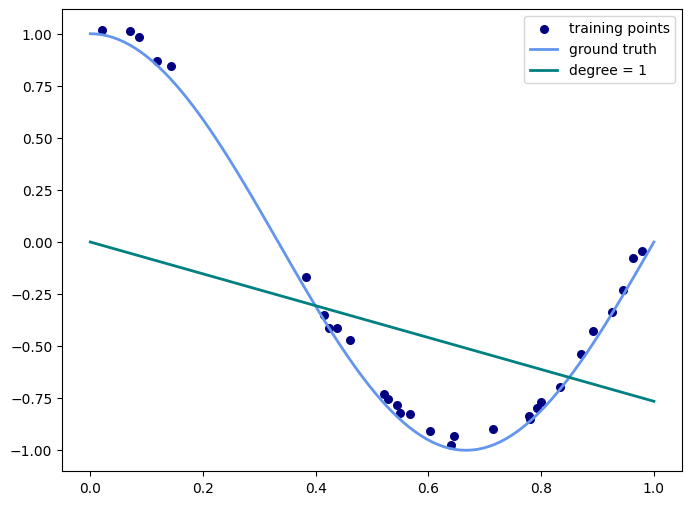

In [5]:
w1 = linear_regression(X,y)
y_hat1 = prdeict_linear_regression(x_plot, w1)

plt.figure(2,figsize=(8,6))
plt.scatter(X, y, color='navy', s=30, marker='o', label="training points")
plt.plot(x_plot, true_fun(x_plot), color='cornflowerblue', linewidth=2, label="ground truth")
plt.plot(x_plot, y_hat1, color='teal', linewidth=2, label="degree = 1")
plt.legend(loc='upper right')
plt.show()

A linear model identifies a hyperplane (in 2D a line and in 3D a plane), not good enough for the case. This is called __underfitting__, where the model does not have enough capacity to represent the data.

Instead of a linear regression as $\hat{y} = w_0 + w_1x$, how about forming a polynomial regression according to:
\begin{align}
    \hat{y} = w_0 + w_1x + w_2x^2 + \cdots + w_px^p
\end{align}

In [6]:
def poly_features(X, poly_degree=2):
    poly_X = np.ones(np.shape(X))
    for tmp_degree in range(poly_degree+1):
        poly_X = np.concatenate((poly_X,X**tmp_degree),axis=1)
    return poly_X

Now, fit a polynomial of degree two (i.e., p = 2) to the data

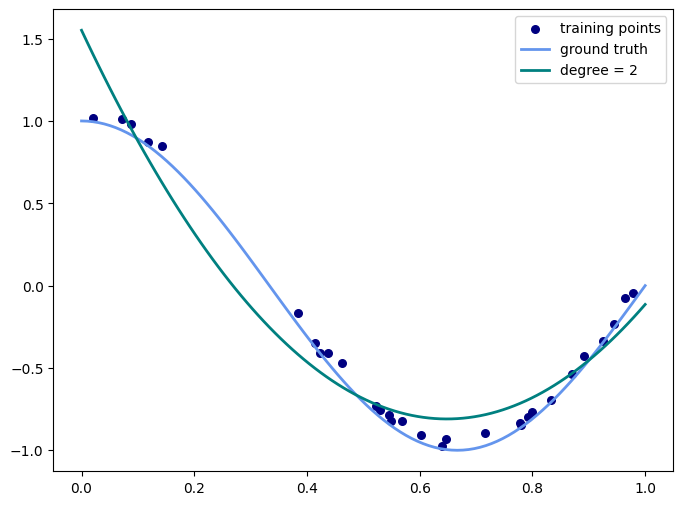

In [7]:
X2 = poly_features(X,2)
w2= linear_regression(X2,y)
y_hat2 = prdeict_linear_regression(poly_features(x_plot,2), w2)

plt.figure(3,figsize=(8,6))
plt.scatter(X, y, color='navy', s=30, marker='o', label="training points")
plt.plot(x_plot, true_fun(x_plot), color='cornflowerblue', linewidth=2, label="ground truth")
plt.plot(x_plot, y_hat2, color='teal', linewidth=2, label="degree = 2")
plt.legend(loc='upper right')
plt.show()

This looks better, how about higher degree polynomials?

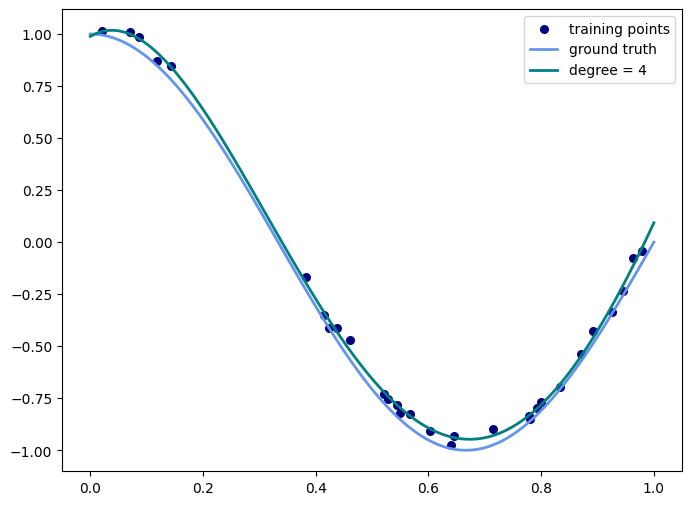

In [8]:
X4 = poly_features(X,4)
w4= linear_regression(X4,y)
y_hat4 = prdeict_linear_regression(poly_features(x_plot,4), w4)

plt.figure(4,figsize=(8,6))
plt.scatter(X, y, color='navy', s=30, marker='o', label="training points")
plt.plot(x_plot, true_fun(x_plot), color='cornflowerblue', linewidth=2, label="ground truth")
plt.plot(x_plot, y_hat4, color='teal', linewidth=2, label="degree = 4")
plt.legend(loc='upper right')
plt.show()

## Overfitting

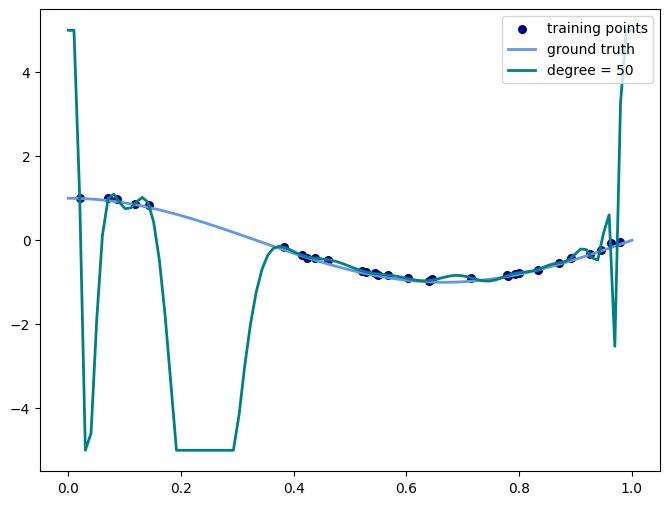

In [9]:
X50 = poly_features(X,50)
w50= linear_regression(X50,y)
y_hat50 = prdeict_linear_regression(poly_features(x_plot,50), w50).clip(-5,5)

plt.figure(5,figsize=(8,6))
plt.scatter(X, y, color='navy', s=30, marker='o', label="training points")
plt.plot(x_plot, true_fun(x_plot), color='cornflowerblue', linewidth=2, label="ground truth")
plt.plot(x_plot, y_hat50, color='teal', linewidth=2, label="degree = 50")
plt.legend(loc='upper right')
plt.show()

The regression model fits very well to the data but predictions do not resemble the true function at all! This is called __overfitting__ where the model fits very well to the training data but cannot generalize to unseen data. The solution? __Regularization__. The Tikhonov regularization (penalizing the loss with $\lambda \|w\|^2$) will be used, which in the case of linear regression leads to the so-called __ridge regression__ model as  
\begin{align}
w^\ast = \big(X^\top X + \lambda\mathbf{I}\big)^{-1}Xy\;.
\end{align}

In [10]:
def ridge_regression(X,y, ridge_lambda = 0.01):
    num_samples, num_features = X.shape
    w0 = np.matmul(X.T, X) + ridge_lambda*np.identity(num_features)
    w1 = np.matmul(np.linalg.pinv(w0),X.T)
    w = np.matmul(w1,y)
    return  w

Now, again fit a polynomial function of degree 50 but with regularization

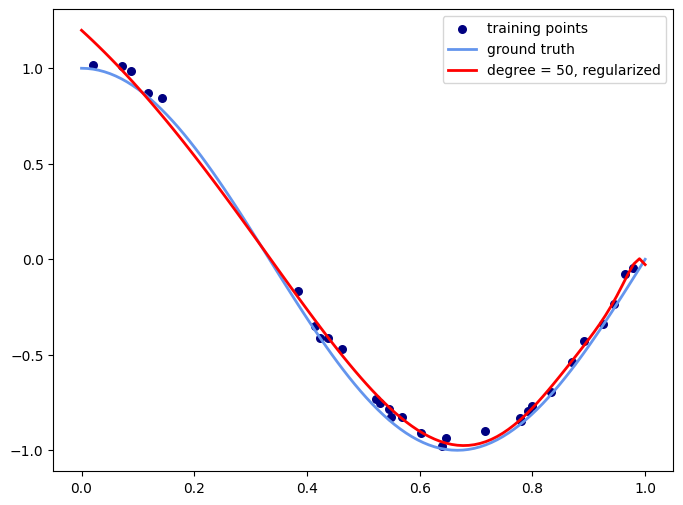

In [11]:
w50_ridge = ridge_regression(X50,y, ridge_lambda=0.001)
y_hat50_ridge = prdeict_linear_regression(poly_features(x_plot,50), w50_ridge)

plt.figure(6,figsize=(8,6))
plt.scatter(X, y, color='navy', s=30, marker='o', label="training points")
plt.plot(x_plot, true_fun(x_plot), color='cornflowerblue', linewidth=2, label="ground truth")
plt.plot(x_plot, y_hat50_ridge, color='red', linewidth=2, label="degree = 50, regularized")
plt.legend(loc='upper right')
plt.show()


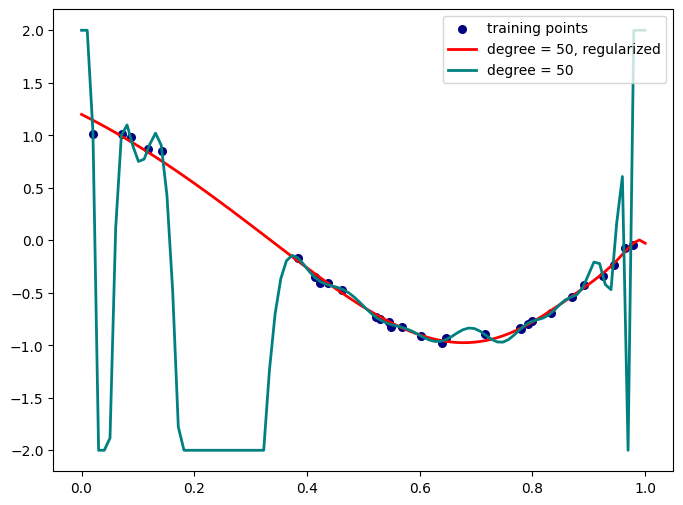

In [12]:
plt.figure(7,figsize=(8,6))
plt.scatter(X, y, color='navy', s=30, marker='o', label="training points")
plt.plot(x_plot, y_hat50_ridge, color='red', linewidth=2, label="degree = 50, regularized")
plt.plot(x_plot, y_hat50.clip(-2,2), color='teal', linewidth=2, label="degree = 50")
plt.legend(loc='upper right')
plt.show()

The regularized model does not go through all data points perfectly (unlike the non-regularized one) but generalzies much better.